### 회귀


머신러닝 관점에서 보면 독립변수는 피처에 해당되며 종속변수는 결정 값 입니다.  
회귀란 여러 개의 독립변수에 따라 종속변수가 어떻게 변화하는지, 즉 주어진 피처와 결정 값 데이터 기반에서 학습을 통해 최적의 회귀 계수를 찾아내는 것입니다.

회귀는 회귀 계수의 선형/비선형 여부, 독립변수의 개수, 종속변수의 개수에 따라 많은 유형으로 나뉘며, 가장 중요한 것은 회귀 계수입니다. 계수에 따라 선형 비선형으로 나뉘며, 독립변수의 개수가 한 개인지 여러 개인지에 따라 단일 회귀, 다중 회귀로 나뉩니다.

회귀는 예측값이 연속형 숫자 값이며, 가장 많이 사용되는 회귀는 선형 회귀 입니다.  
실제 값과 예측값의 차이( 오류의 제곱 값 )를 최소화하는 직선형 회귀선을 최적화하는 방식입니다.  
여기서도 과적합 문제를 해결하기 위해 회귀 계수에 페널티 값을 적용하는 여러 가지 규제가 존재합니다.

선형 회귀 모델 종류  
1. **일반 선형 회귀**  
: 예측값과 실제 값의 RSS( RESIDUAL SUM OF SQUARES )가 최소화되도록 회귀 계수를 최적화하며, 규제를 적용하지 않은 모델입니다.  
2. **릿지**  
: 선형 회귀에 L2규제를 추가한 회귀 모델로, L2규제는 상대적으로 큰 회귀 계수 값의 예측 영향도를 감소시키기 위해서 회귀 계수값을 더 작게 만드는 규제 모델입니다.  
3. **라쏘**  
: 선형 회귀에 L1규제를 적용한 회귀 모델로, L2규제는 회귀 계수 값의 크기를 줄이는데 반해, L1규제는 예측 영향력이 작은 피처의 회귀 계수를 0으로 만들어 회귀 예측 시 피처가 선택되지 않게 하는 것입니다.
4. **엘라스틱넷**  
: L1, L2규제를 함께 결합한 모델로, 주로 피처가 많은 데이터 세트에서 적용되며, L1규제로 피처의 개수를 줄임과 동시에 L2 규제로 계수 값의 크기를 조정합니다.
5. **로지스틱 회귀**  
: 분류에서 뛰어난 예측 성능을 보이는 선형 모델입니다.

In [1]:
from IPython.display import Image

![잔차](잔차.png)
실제 값과 회귀 모델의 차이에 따른 오류 값을 남은 오류, 즉 잔차라고 부릅니다.  
최적의 회귀 모델을 만드는 것은 전체 데이터의 잔차( 오류 값 )의 합이 최소가 되는 모델을 만들고, 오류 값합이 최소가 될 수 있는 최적의 회귀 계수를 찾는다는 의미입니다.

오류 값이 +, -가 될 수 있기 때문에 오류 합을 계산할 때는 절대값을 취해서 더하거나, 오류 값의 제곱을 구해서 더하는 방식을 취하며, 미분등의 계산을 편하게 하기 위해서 RSS방식으로 오류 합을 구합니다.  
* ***Error^2 = RSS.***  
  
회귀에서 RSS는 비용이며 W변수(회귀 계수)로 구성되는 RSS를 비용함수라고 합니다. 머신러닝 회귀는 데이터를 계속 학습하면서 이 비용 함수가 반환하는 값( 오류 값 )을 지속해서 감소시키고 최종적으로는 더 이상 감소하지 않는 최소의 오류 값을 구하는 것입니다.

#### 경사 하강법 - 비용 최소화하기
반복적으로 반환되는 비용 하수의 반환 값, 즉 예측값과 실제 값의 차이가 작아지는 방향성을 가지고 W파라미터를 지속해서 보정해 나갑니다. 그러면서 오류 값이 더 이상 작아지지 않으면 그 오류 값을 최소 비용으로 판단하고 그 때의 W값을 최적 파라미터로 반환합니다.

In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\SANGMIN\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classi

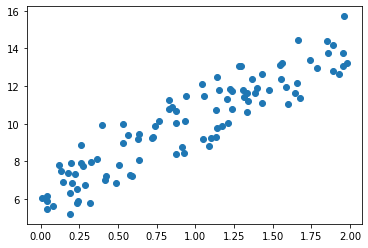

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

np.random.seed(0)
X = 2 * np.random.rand(100, 1)
y = 6 + 4 * X + np.random.randn(100, 1)

plt.scatter(X,y)

경사하강법을 이용한 단순 선형 회귀는 w1과 w0을 모두 0으로 초기화한 뒤 특정 횟수만큼 반복하면서  
w1과 w0을 업데이트하는 것입니다.

In [3]:
def get_weight_updates(w1,w0,X,y,learning_rate=0.01):
    N = len(y)
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0) 
    
    y_pred = np.dot(X,w1.T) + w0
    diff= y-y_pred
    
    w0_factors = np.ones((N,1))
        
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

**반복적으로 경사 하강법을 이용하여 get_weigth_updates()를 호출하여 w1과 w0를 업데이트 하는 함수 생성**

In [4]:
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
              
    return w1, w0

**예측 오차 비용을 계산을 수행하는 함수 생성 및 경사 하강법 수행**

In [5]:
def get_cost(y, y_pred):
    N = len(y) 
    cost = np.sum(np.square(y - y_pred))/N
    return cost

w1, w0 = gradient_descent_steps(X, y, iters=1000)
print("w1:{0:.3f} w0:{1:.3f}".format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.022 w0:6.162
Gradient Descent Total Cost:0.9935


실제 선형식인 y= 4X + 6과 유사하게 w1은 4.028, w0은 6.490이 도출되었으며, 예측 오류 비용은 0.0775 입니다.

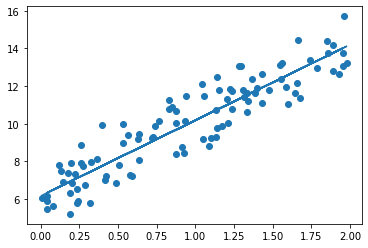

In [6]:
plt.scatter(X,y)
plt.plot(X,y_pred)

경사 하강법은 모든 학습데이터에 대해 반복적으로 비용함수 최소화를 위한 값을 업데이트하기에 시간이 오래걸리는 단점이 존재합니다. 그래서 확률적 경사 하강법을 이용해 최적의 비용함수를 도출합니다.

**(미니 배치)확률적 경사 하강법을 이용한 최적 비용함수 도출**

In [7]:
def stochastic_gradient_descent_steps(X,y,batch_size=10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost= 1000
    iter_index=0
    
    for i in range(iters):
        np.random.seed(i)
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
    
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y,learning_rate=0.01)
        w1= w1-w1_update
        w0= w0=w0_update
    
    return w1,w0

* numpy.random.seed(n)을 이용하여 임의의 시드를 생성할 수 있습니다. 시드 값에 따라 난수와 흡사하지만 항상 같은 결과를 반환합니다.
* np.random.permutation()을 이용하여 무작위로 섞인 배열을 만듭니다.

In [8]:
stochastic_gradient_descent_steps(X,y,iters=1000)
print("w1: ",round(w1[0,0],3), "\nw0: ",round(w0[0,0],3))
y_pred = w1[0,0] * X + w0
print('stochastice_gradient_descent_total : {0:.3f}'.format(get_cost(y,y_pred)))

w1:  4.022 
w0:  6.162
stochastice_gradient_descent_total : 0.993


(미니 배치)확률적 경사 하강법과 경사 하강법으로 구한 값과 성능상의 큰 차이가 없으므로 큰 데이터를 처리할 경우에는 확률적 경사 하강법을 이용하는 것이 적절합니다.

#### 사이킷런 LinearRegression을 이용한 보스턴 주택 가격 예측

In [9]:
from sklearn.datasets import load_boston
import pandas as pd
boston = load_boston()
boston_df = pd.DataFrame(boston.data,columns=boston.feature_names)
boston_df["Price"] = boston.target
print(boston_df.shape)
boston_df.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


**피처들에 대한 설명**
* CRIM : 지역별 범죄 발생률
* ZN : 25,000평방피트를 초과하는 거주 지역의 비율
* INDUS	: 비상업 지역 넓이 비율
* CHAS : 찰스강에 대한 더미 변수( 강의 경계에 위치한 경우 1, 아니면 0 )
* NOX : 일산화질소 농도
* RM : 거주할 수 있는 방 개수
* AGE : 1940년 이전에 건축된 소유 주택의 비율
* DIS : 5개 주요 고용센터까지의 가중 거리
* RAD : 고속도로 접근 용이도
* TAX : 10,000달러당 재산세율
* PTRATIO : 지역의 교사와 학생 수 비율
* B : 지역의 흑인 거주 비율
* LSTAT : 하위 계층의 비율

In [10]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
Price      506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


널값이 존재하지 않으며 데이터는 모두 float형태입니다.

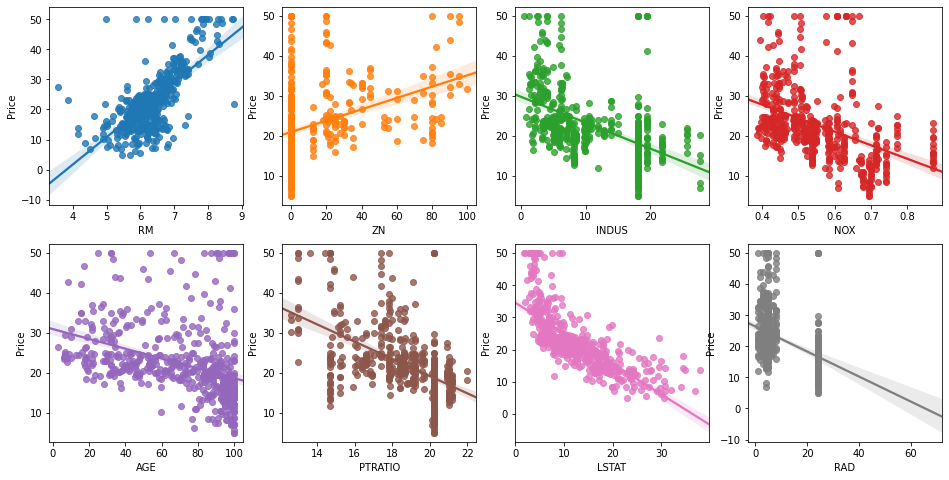

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(16,8),ncols=4,nrows=2)
lm_feature = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i,feature in enumerate(lm_feature):
    row = int(i/4)
    col = i%4
    sns.regplot(data=boston_df,x=feature,y='Price',ax=ax[row][col]) # x축은 피처, y축은 target

시본의 regplot( )는 X,Y축 값의 산점도와 함께 선형 회귀 직선을 그려줍니다.

RM과 LSTAT이 가격에 대한 영향도가 높은 것으로 나타납니다.  
RM은 방의 크기가 클수록 가격이 증가하는 모습을 보여주며,  
LSTAT은 적을수록 가격이 증가하는 모습을 나타냅니다.

##### LinearRegression 클래스를 이용한 보스턴 주택가격의 회귀 모델***

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
y_target= boston_df['Price']
X_data = boston_df.drop(['Price'],axis=1)

X_train,X_test,y_train,y_test = train_test_split(X_data, y_target,test_size=0.3, random_state=156)

lr = LinearRegression()
lr.fit(X_train,y_train)
pred = lr.predict(X_test)
mse = mean_squared_error(y_test,pred)
rmse = np.sqrt(mse)
r2_score = r2_score(y_test,pred)

print("MSE : {0:.3f}, RMSE : {1:.3f}\nVariance score : {2:.3f}".format(mse,rmse,r2_score))

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [13]:
print('절편 값:',lr.intercept_)
print('회귀 계수값:',np.round(lr.coef_,1))

절편 값: 40.995595172164336
회귀 계수값: [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


절편과 회귀 계수는 LinearRegression객체의 intercept_속성에, 회귀 계수는 coef_ 속성에 값이 저장돼있습니다.

In [14]:
cof = pd.Series(data=np.round(lr.coef_,1), index=X_data.columns)
cof.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

RM이 양의 값으로 회귀 계수가 가장 크며,NOX은 음의 값으로 회귀 계수가 가장 크며, NOX의 음의 값은 너무 커보이기 때문에 최적화가 필요해보입니다.

In [15]:
from sklearn.model_selection import cross_val_score

y_target = boston_df['Price']
X_data = boston_df.drop(['Price'],axis=1)
lr = LinearRegression()

neg_mse_scores = cross_val_score(lr,X_data,y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print('5folds의 개별 negative mse scores : ',np.round(neg_mse_scores,2))
print('5folds의 개별 rmse scores : ',np.round(rmse_scores,2))
print('5folds의 평균 rmse : ',np.round(avg_rmse,2))

5folds의 개별 negative mse scores :  [-12.46 -26.05 -33.07 -80.76 -33.31]
5folds의 개별 rmse scores :  [3.53 5.1  5.75 8.99 5.77]
5folds의 평균 rmse :  5.83


cross_val_score를 통해 5개 폴드 세트에 대해서 교차 검증을 수행해 mse와 rmse를 측정해보았습니다.  
사이킷런의 지표 평가 기준은 높은 지표 값일수록 좋은 모델이지만, 회귀에서는 mse값이 낮을수록 좋은 회귀 모델입니다.  
  
사이킷런의 metric 평가 기준에 mse를 부합시키기 위해서 cross_val_score()인자로 scoring='neg_mean_squared_error'를 지정하면 반환되는 수치는 음수 값이며 거기에 -1을 곱해서 반환해야 원래 모델에서 계산된 mse값을 구할 수 있으며, 반환된 mse값에 sqrt()함수를 적용해 rmse값을 구할 수 있습니다. 

#### 다항 회귀와 과적합/과소적합 이해

회귀가 독립변수의 단항식이 아닌 2,3차 방정식과 같은 다항식으로  표현된 것을 다항회귀라고합니다.  
회귀에서 선형/ 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따라 결정하는 것이며, 다항 회귀는 선형회귀 입니다.

##### 다항회귀

In [16]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처:\n',X)

poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 피처:\n',poly_ftr)

일차 단항식 계수 피처:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 피처:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [17]:
def polynomial(X):
    y= 1+2*X+X**2+X**3
    return y

X=np.arange(4).reshape(2,2)
print('일차 단항식 계수값:\n',X)
y = polynomial(X)
print('삼차 다항식 결정값:\n',y)

일차 단항식 계수값:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
 [[ 1  5]
 [17 43]]


In [18]:
X=np.arange(4).reshape(2,2)
print('일차 단항식 계수:\n',X)
poly = PolynomialFeatures(degree=3)
poly.fit(X)
poly_ftr = poly.transform(X)
print('3차 다항식 계수: \n',poly_ftr)
lr = LinearRegression()
lr.fit(poly_ftr,y)
print('Polynomical 회귀 계수:\n',np.round(lr.coef_,2))
print('Polynomical 회귀 shape:\n',lr.coef_.shape)

일차 단항식 계수:
 [[0 1]
 [2 3]]
3차 다항식 계수: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
Polynomical 회귀 계수:
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]
Polynomical 회귀 shape:
 (2, 10)


일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomical변환 이후에는 다항식 계수 피처가 10개로  
늘어나며, 이 피처 데이터세트에 LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면  
회귀 계수가 10개로 늘어납니다.

In [19]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomical_func(X):
    y= 1+ 2*X + X**2 + X**3
    return y

model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomical_func(X)

model = model.fit(X,y)
print('Polynomical 회귀 계수 :\n',np.round(model.named_steps['linear'].coef_,2))

Polynomical 회귀 계수 :
 [[0.   0.02 0.02 0.05 0.07 0.1  0.1  0.14 0.22 0.31]
 [0.   0.06 0.06 0.11 0.17 0.23 0.23 0.34 0.51 0.74]]


피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다는 사이킷런의 Pipeline객체를 이용해 한 번에 다항 회귀를 구현할 수 있습니다.

##### 다항회귀 과적합 과소적합

다항 회귀의 차수가 높아질수록 복잡한 피처 간의 관계까지 모델링이 가능하지만 학습 데이터에만 너무 맞춘 학습이 이뤄져서 정작 테스트 데이터 환경에서는 예측 정확도가 떨어지는 과적합의 문제가 발생합니다.

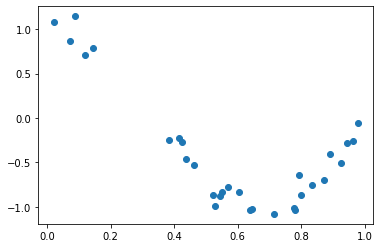

In [20]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def true_fun(X):
    return np.cos(1.5 * np.pi *X)

np.random.seed(0)
n_samples = 30
X= np.sort(np.random.rand(n_samples))

y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.scatter(X,y)

degree 1의 회귀 계수는 [ 0. -2.] 입니다.
defree 1 MSE는 0.41입니다.

degree 4의 회귀 계수는 [  0.   0. -18.  24.  -7.] 입니다.
defree 4 MSE는 0.04입니다.

degree 15의 회귀 계수는 [ 0.00000000e+00 -2.98300000e+03  1.03899000e+05 -1.87415000e+06
  2.03715070e+07 -1.44872540e+08  7.09312076e+08 -2.47064758e+09
  6.24558687e+09 -1.15676114e+10  1.56894446e+10 -1.54005584e+10
  1.06456985e+10 -4.91376342e+09  1.35919341e+09 -1.70380431e+08] 입니다.
defree 15 MSE는 181810251.66입니다.



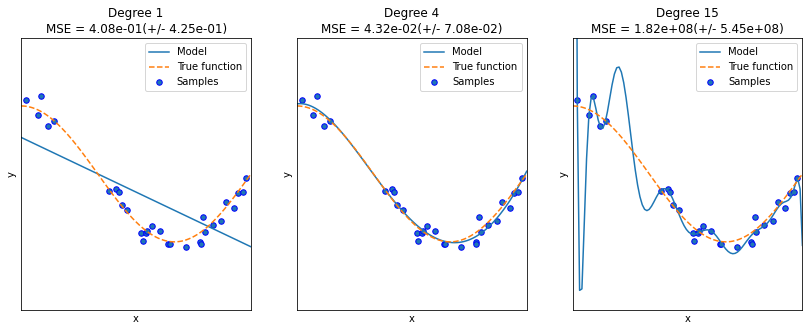

In [21]:
plt.figure(figsize=(14,5))
degrees=[1, 4, 15]

for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees),i+1)
    plt.setp(ax, xticks=(),yticks=())
    
    polynomial_features = PolynomialFeatures(degree=degrees[i])
    lr = LinearRegression()
    pipeline = Pipeline([("poly",polynomial_features),("lr",lr)])
    pipeline.fit(X.reshape(-1,1),y)
    
    scores = cross_val_score(pipeline,X.reshape(-1,1),y,scoring='neg_mean_squared_error',cv=10)
    coff = pipeline.named_steps['lr'].coef_
    print('degree {0}의 회귀 계수는 {1} 입니다.'.format(degrees[i],np.round(coff),2))
    print('defree {0} MSE는 {1:.2f}입니다.\n'.format(degrees[i],np.mean(scores)*-1))
    
    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=30, label="Samples")
    
    plt.xlabel("x")
    plt.ylabel("y") 
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

**degree 1**  
: 단순 선형 회귀와 똑같으며, 예측 곡선이 학습 데이터의 패턴을 반영하지 못하고 있는 과소적합 모델입니다. MSE는 0.41    

**degree 4**
: 학습 데이터를 잘 반영해 코사인 곡선 기반으로 테스트 데이터를 잘 예측한 모델입니다.  
MSE는 0.04로 가장 뛰어난 예측 성능을 나타내고 있습니다.  

**degree 15**
: 학습 데이터를 지나치게 반영하여 예측 곡선이 학습 데이터 세트만 정확히 예측하고, 테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어진 과적합이 심한 모델입니다.  
MSE는 181810251이 될 정도로 큰 오류 값이 발생했습니다.

####  릿지, 라쏘, 엘라스틱넷  

선형 모델의 비용 함수는 RSS를 최소화하는, 실제값과 예측값의 차이를 최소화하는 것을 고려했더니 학습 데이터에 지나치게 맞추게되고, 회귀계수가 커지는 상황이 발생하여 오히려 테스트 데이터에서는 예측 성능이 저하되었습니다. 회귀 계수의 크기를 제어해 과적합을 개선하려면 비용함수가 최소화되어야하는데 여기서 alpha라는 학습 데이터 적합 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파라미터를 사용한다.
  
  ![title](비용함수목표.png) 
  
alpha가 0 또는 매우 작은 값이라면 비용 함수 식은 Min(RSS(W)+0)이 될 것이며, 무한대 또는 매우 큰 값이라면 비용 함수는 RSS(W)에 비해 너무 커지게 되므로 W 값을 0 또는 매우 작게 만들어야 Cost가 최소화되는 비용 함수 목표를 달성할 수 있습니다.  
  
이처럼 비용 함수에 alpha 값으로 페널티를 부여해 회귀 계수 값의 크기를 감소시켜 과적합을 개선하는 방식을 **규제(Regularization)** 라고 부릅니다.

**규제(Regularization)** 종류
* L2 : W의 제곱에 대해 페널티를 부여하는 방식 -> **릿지(Ridge)**
* L1 : W의 절댓값에 대해 페널티를 부여하는 방식 -> **라쏘(Lasso)**

##### 릿지 회귀

In [22]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,scoring='neg_mean_squared_error',cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


릿지의 5개 폴드 세트의 평균 RMSE가 5.518입니다. 예제의 규제가 없는 LinearRegression의 RMSE 평균인 5.38보다 더 뛰어난 예측 성능을 보여줍니다.

In [23]:
alphas = [0, 0.1, 1, 10, 100]

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring='neg_mean_squared_error',cv=5)
    rmse_scores = np.sqrt(-1*neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print("alpha {0} 일 때 5 folds의 평균 RMSE : {1:.3f}".format(alpha,avg_rmse))

alpha 0 일 때 5 folds의 평균 RMSE : 5.829
alpha 0.1 일 때 5 folds의 평균 RMSE : 5.788
alpha 1 일 때 5 folds의 평균 RMSE : 5.653
alpha 10 일 때 5 folds의 평균 RMSE : 5.518
alpha 100 일 때 5 folds의 평균 RMSE : 5.330


릿지 회귀는 alpha값이 커질수록 회귀 계수 값을 작게 만들며, alpha값이 10일 때 평균 RMSE가 5.518로 가장 좋습니다. 

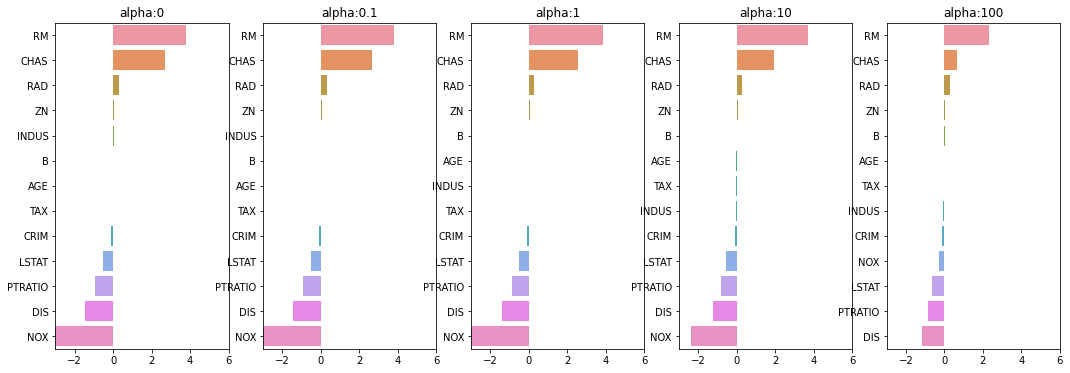

In [37]:
fig , ax = plt.subplots(figsize=(18,6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns)
    colname = 'alpha:'+str(alpha)
    coeff_df[colname] = coeff
    
    coeff = coeff.sort_values(ascending=False)
    ax[pos].set_title(colname)
    ax[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=ax[pos])
    
plt.show()

alpha값을 계속 증가시킬수록 회귀 계수값은 계속 작아지며 특히 NOX피처의 경우 alpha값을 증가시킴에 따라 회귀계수가 크게 작아지고 있습니다.

In [38]:
ridge_alphas = [0, 0.1, 1, 10, 100]
colnames = 'alpha:'+ str(ridge_alphas[0])
coeff_df.sort_values(by=colnames, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


alpha값이 증가하면서 회귀 계수가 지속적으로 작아지고 있지만, 릿지 회귀에서는 회귀 계수를 0으로 만들지는 않습니다.

##### 라쏘 회귀

In [111]:
from sklearn.linear_model import Lasso,ElasticNet
    
def get_linear_reg_eval(model_name,params=None,X_data_n=None,y_target_n=None,verbose=True):
    coeff_df = pd.DataFrame()
    if verbose :
        print("####### ",model_name, "#######")
    for param in params:
        if model_name == 'Ridge':
            model = Ridge(alpha = param)
        elif model_name == "Lasso":
            model = Lasso(alpha = param)
        elif model_name == "ElasticNet":
            model = ElasticNet(alpha = param, l1_ratio=0.7)
        
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,scoring='neg_mean_squared_error',cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print('alpha {0} 일때 5 폴드 세트의 평균 RMSE : {1:.3f}'.format(param, avg_rmse))
        
        model.fit(X_data , y_target)
        coeff = pd.Series(data=model.coef_, index=X_data.columns)
        colname = 'alpha:'+str(param)
        coeff_df[colname]=coeff    
    return coeff_df


In [90]:
alpha = [0.07, 0.1, 0.5,1,3]

coeff_lasso_df = get_linear_reg_eval('Lasso', params=alpha,X_data_n=X_data,y_target_n=y_target,verbose=True)

#######  Lasso #######
alpha 0.07 일때 5 폴드 세트의 평균 RMSE : 5.612
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.615
alpha 0.5 일때 5 폴드 세트의 평균 RMSE : 5.669
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.776
alpha 3 일때 5 폴드 세트의 평균 RMSE : 6.189


alpha가 0.07일 때 가장 좋은 평균 RMSE를 보여줍니다.

In [91]:
sort_col = 'alpha:'+str(alpha[0])
coeff_lasso_df.sort_values(by=sort_col,ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


alpha의 크기가 증가함에 따라 일부 피처의 회귀 계수는 0으로 바뀌고 있으므로, 회귀 식에서 회귀 계수가 0인 피처를 제외하면서 피처 선택의 효과를 얻을 수 있습니다.

##### 엘라스틱넷

In [94]:
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval('ElasticNet', params=elastic_alphas,X_data_n=X_data,y_target_n=y_target,verbose=True)

#######  ElasticNet #######
alpha 0.07 일때 5 폴드 세트의 평균 RMSE : 5.542
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.526
alpha 0.5 일때 5 폴드 세트의 평균 RMSE : 5.467
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.597
alpha 3 일때 5 폴드 세트의 평균 RMSE : 6.068


In [96]:
sort_col='alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_col, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


alpha값이 0.5일때 RMSE가 가장 좋은 예측 성능을 나타내며, 라쏘보다는 alpha값에 따른 피처들의 회귀 계수들 값이 0이되는 값이 적은 것을 알 수 있습니다.

In [118]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PolynomialFeatures

def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
        
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree,include_bias=False).fit_transform(scaled_data)

    return scaled_data

표준 정규 분포 변환, 최댓값/최솟값 정규화, 로그 변환을 차례로 적용한 후에 RMSE로 각 경우별 예측 성능을 측정하는 함수를 생성하였습니다.

In [119]:
alphas = [0.1, 1, 10, 100]

scale_method = [(None,None),('Standard',None),('Standard',2),('MinMax',None),('MinMax',2),('Log',None)]

for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0],p_degree=scale_method[1]
                                    ,input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.788
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.653
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.518
alpha 100 일때 5 폴드 세트의 평균 RMSE : 5.330

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.826
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.803
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.637
alpha 100 일때 5 폴드 세트의 평균 RMSE : 5.421

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 8.827
alpha 1 일때 5 폴드 세트의 평균 RMSE : 6.871
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.485
alpha 100 일때 5 폴드 세트의 평균 RMSE : 4.634

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.764
alpha 1 일때 5 폴드 세트의 평균 RMSE : 5.465
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.754
alpha 100 일때 5 폴드 세트의 평균 RMSE : 7.635

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1 일때 5 폴드 세트의 평균 RMSE : 5.298
alpha 1 일때 5 폴드 세트의 평균 RMSE : 4.323
alpha 10 일때 5 폴드 세트의 평균 RMSE : 5.185
alpha 100 일때 5 폴드 세트의 평균 RMSE : 6.538

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1 일때 5 폴

표준 정규 분포로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=100에서 4.634로 성능 개선되었으며,  
최솟/최댓값 정규화로 일차 변환 후 2차 다항식 변환을 했을 때 alpha=1에서 4.32으로 성능이 개선됐습니다.     

-> 하지만 2차 다항식 변환은 피처의 개수가 많거나 데이터 건수가 많은 경우에는 계산에 많은 시간이 소모되어 적용에 한계가 존재합니다.  
  
  로그 변환은 모두 좋은 성능 향상이 있습니다.  
-> 데이터 세트의 데이터 값으 ㅣ분포가 심하게 왜곡되어 있을 경우에 로그 변환 적용하는 것이 효과적입니다.  
